In [1]:
## Yolo v5 model

%cd /content/drive/MyDrive/Ninti/
!git clone 'https://github.com/ultralytics/yolov5.git'
!pip install yolov5

/content/drive/MyDrive/Ninti
fatal: destination path 'yolov5' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.3/953.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.9/135.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install -r '/content/drive/MyDrive/Ninti/yolov5/requirements.txt'
%cd /content/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content


In [3]:
import torch
import shutil # for file operations
import zipfile, os, sys, random
from glob import glob
import pandas as pd # for data manipulation
import numpy as np # for dealing with arrays
from sklearn import preprocessing # for preprocessing purpose
import cv2 # for displaying the image
from matplotlib import patches # data visualization
import matplotlib.pyplot as plt # data visualization

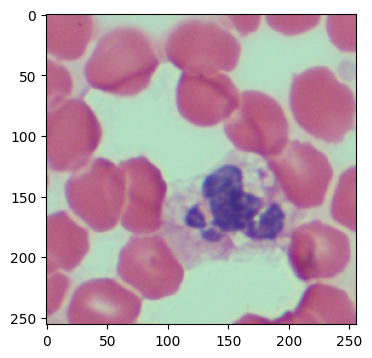

In [4]:
%matplotlib inline
inp_img = "/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png"
fig=plt.figure(figsize=(4, 5))
img = plt.imread(inp_img)
plt.imshow(img)
plt.show()

[Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/pyparsing-3.0.9.dist-info/METADATA'


YOLOv5 🚀 v7.0-183-g878d9c8 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 256x256 24 rbcs, 1 wbc
Speed: 29.6ms pre-process, 82.1ms inference, 28.1ms NMS per image at shape (1, 3, 256, 256)


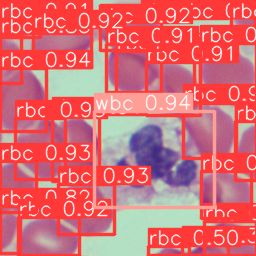

,xmin,ymin,xmax,ymax,confidence,class,name
0,200.630280,43.615490,256.000000,103.849030,0.946095,0,rbc
1,94.490532,111.482162,214.880188,207.024490,0.943507,1,wbc
2,0.590872,68.594070,46.396843,131.351044,0.938513,0,rbc
3,201.482941,171.839767,251.483765,218.934189,0.935572,0,rbc
4,58.805801,184.553925,114.187714,234.669250,0.934129,0,rbc
5,0.232843,161.804428,36.512299,212.356339,0.931308,0,rbc
6,15.267353,118.412201,65.932449,179.478394,0.930641,0,rbc
7,18.316820,217.435715,79.240608,255.678574,0.924641,0,rbc
8,183.297440,102.672523,236.768539,158.833160,0.923321,0,rbc
9,33.916885,10.088369,91.935425,67.802910,0.923103,0,rbc


In [5]:
### https://github.com/ultralytics/yolov5/discussions/8047#discussioncomment-2853739

# Set the path to the custom model directory
model_dir = '/content/drive/MyDrive/Ninti/yolov5'

# Model
model = torch.hub.load(model_dir, 'custom', path='/content/drive/MyDrive/Ninti/yolov5/runs/train/rbcd/weights/best.pt', source='local')


# Set the confidence threshold for object detection
conf_thres = 0.25

# Load the image
im = '/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png'

# Inference
results = model(im, size=256)         ##### https://github.com/ultralytics/yolov5/issues/5304#issuecomment-950025198

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
results.show()
results.xyxy[0]  # im predictions (tensor)
results.pandas().xyxy[0]  # im predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

In [6]:
 ##### https://github.com/ultralytics/yolov5/issues/5304#issuecomment-950025198


 #def forward(self, imgs, size=640, augment=False, profile=False):
     # Inference from various sources. For height=640, width=1280, RGB images example inputs are:
     #   filename:   imgs = 'data/images/zidane.jpg'
     #   URI:             = 'https://github.com/ultralytics/yolov5/releases/download/v1.0/zidane.jpg'
     #   OpenCV:          = cv2.imread('image.jpg')[:,:,::-1]  # HWC BGR to RGB x(640,1280,3)
     #   PIL:             = Image.open('image.jpg')  # HWC x(640,1280,3)
     #   numpy:           = np.zeros((640,1280,3))  # HWC
     #   torch:           = torch.zeros(16,3,320,640)  # BCHW (scaled to size=640, 0-1 values)
     #   multiple:        = [Image.open('image1.jpg'), Image.open('image2.jpg'), ...]  # list of images


In [7]:
!python /content/drive/MyDrive/Ninti/yolov5/detect.py --source /content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png --imgsz 256 --weights '/content/drive/MyDrive/Ninti/yolov5/runs/train/rbcd/weights/best.pt' --line-thickness=1

detect: weights=['/content/drive/MyDrive/Ninti/yolov5/runs/train/rbcd/weights/best.pt'], source=/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png, data=drive/MyDrive/Ninti/yolov5/data/coco128.yaml, imgsz=[256, 256], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/Ninti/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-183-g878d9c8 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png: 256x256 24 rbcs, 1 wbc, 76.8ms
Speed: 0.7ms pre-process, 76.8ms inference, 1.9ms NMS per image at shape (1, 3, 256, 256)
Results

(256, 256, 3)


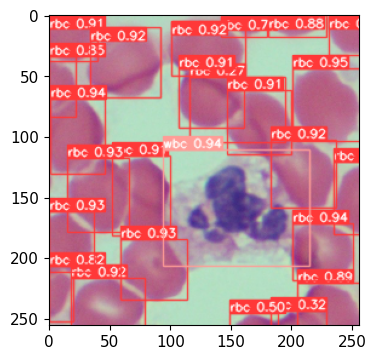

In [11]:
%matplotlib inline
inp_img = "/content/drive/MyDrive/Ninti/yolov5/runs/detect/exp7/image-106.png"
fig=plt.figure(figsize=(4, 5))
img = plt.imread(inp_img)
print(img.shape)
plt.imshow(img)
plt.show()

In [12]:
box = []
conf = []
cls = []
for i in results.xyxy[0]:
  x = i.numpy()
  box.append(x[:4])
  conf.append(x[4])
  cls.append(x[5])

cls = [str(int(i)) for i in cls]
print(box)
print(conf)
print(cls)

[array([     200.63,      43.615,         256,      103.85], dtype=float32), array([     94.491,      111.48,      214.88,      207.02], dtype=float32), array([    0.59087,      68.594,      46.397,      131.35], dtype=float32), array([     201.48,      171.84,      251.48,      218.93], dtype=float32), array([     58.806,      184.55,      114.19,      234.67], dtype=float32), array([    0.23284,       161.8,      36.512,      212.36], dtype=float32), array([     15.267,      118.41,      65.932,      179.48], dtype=float32), array([     18.317,      217.44,      79.241,      255.68], dtype=float32), array([      183.3,      102.67,      236.77,      158.83], dtype=float32), array([     33.917,      10.088,      91.935,      67.803], dtype=float32), array([     100.77,       5.034,      161.54,      50.285], dtype=float32), array([          0,           0,      40.403,       37.87], dtype=float32), array([     146.79,      62.025,      200.18,      115.14], dtype=float32), array([    

In [13]:
### download the font and send upload to gdrive
### good fonts can be easily downloaded from google fonts

%cd /content/drive/MyDrive/
!cp "/content/drive/MyDrive/Colab Notebooks/Bruno_Ace_SC.zip (Unzipped Files)/BrunoAceSC-Regular.ttf" /usr/share/fonts/truetype/
!fc-cache -f -v

/content/drive/MyDrive
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 1 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [14]:
from PIL import Image, ImageDraw, ImageFont
import torchvision.transforms as transforms

det_cells = []


for i in range(len(box)):

  image = '/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png'
  img = Image.open(image)
  grid_image = Image.new('RGB', (256, 256), color='grey')
  draw = ImageDraw.Draw(grid_image)
  draw = ImageDraw.Draw(img)

  xmin, ymin, xmax, ymax = box[i]

  if conf[i]>.3:
    draw.rectangle((xmin, ymin, xmax, ymax ), outline='red' if cls[i]=='0' else 'blue', width=1)

    det_cells.append(img)


In [15]:
from PIL import Image, ImageDraw, ImageFont
import torchvision.transforms as transforms

def create_image_grid(image, pil_images, image_names, rows, columns, im_name):

    # Add the main image to the list of images
    pil_images = [image] + pil_images
    image_names = ['Original Image'] + image_names

    # Calculate the size of the grid image
    img_width, img_height = image.size
    grid_width = img_width * columns + (columns - 1) * 20
    grid_height = img_height * rows + (rows - 1) * 10 + 30 * rows

    # Create a blank grid image
    grid_image = Image.new('RGB', (grid_width, grid_height), color='grey')
    draw = ImageDraw.Draw(grid_image)

    # font customize
    font = ImageFont.truetype('BrunoAceSC-Regular.ttf', size=24)

    # Add images and names to the grid
    for i in range(rows):
        for j in range(columns):
            index = i * columns + j

            if index < len(pil_images):

                img = pil_images[index]
                x_offset = j * (img_width + 10)
                y_offset = i * (img_height + 40)
                grid_image.paste(img, (x_offset, y_offset))

                if str(image_names[index]) == '0':
                  image_name = "RBC"
                elif str(image_names[index]) == '1':
                  image_name = "WBC"
                else:
                  image_name = image_names[index]

                text_width, text_height = draw.textsize(image_names[index], font)
                text_x = x_offset + (img.size[0] - text_width) // 2
                text_y = y_offset + img.size[1]
                draw.text((text_x, text_y), image_name, font=font, fill='black')

    grid_image.save('/content/drive/MyDrive/Ninti/'+im_name)
    return grid_image

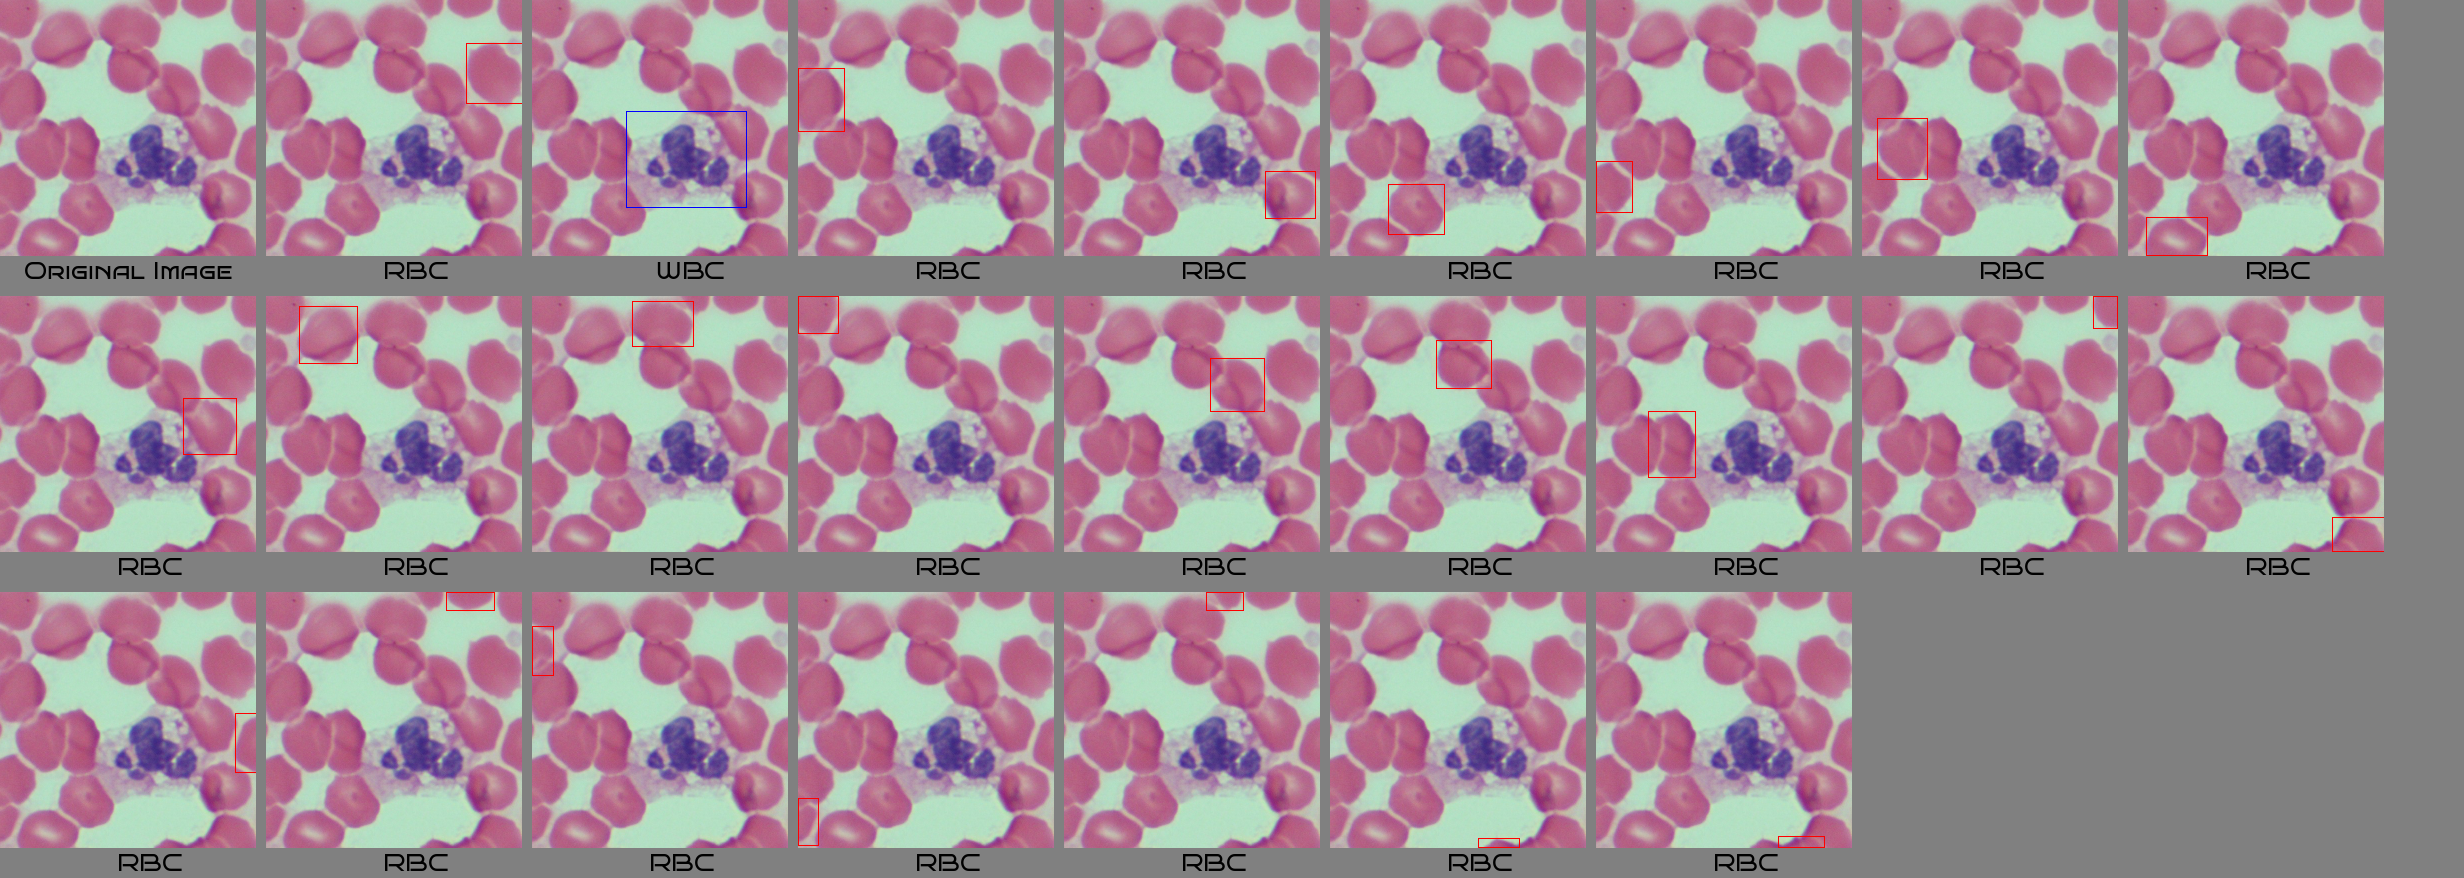

In [16]:
create_image_grid(img, det_cells, cls, 3, 9, 'each-cell.jpg')

In [17]:
from PIL import Image

crop_cells = []
crop_cell_images = []

# Load the original image

for i in range(len(box)):

  if conf[i]>.3:

    # Load the original image
    image = '/content/drive/MyDrive/Ninti/unzipped_dataset/cells/images/train/image-106.png'
    img = Image.open(image)

    # Crop the image based on the bounding box coordinates
    x1, y1, x2, y2 = [int(i) for i in box[i]]
    cropped_image = img.crop((x1, y1, x2, y2))
    crop_cells.append(cropped_image)

    # Create a new blank image of the same size as the bounding box
    output_image = Image.new('RGB', (256, 256), color='white')

    # Paste the cropped image onto the blank image at the appropriate coordinates
    output_image.paste(cropped_image, (x1, y1))

    crop_cell_images.append(output_image)


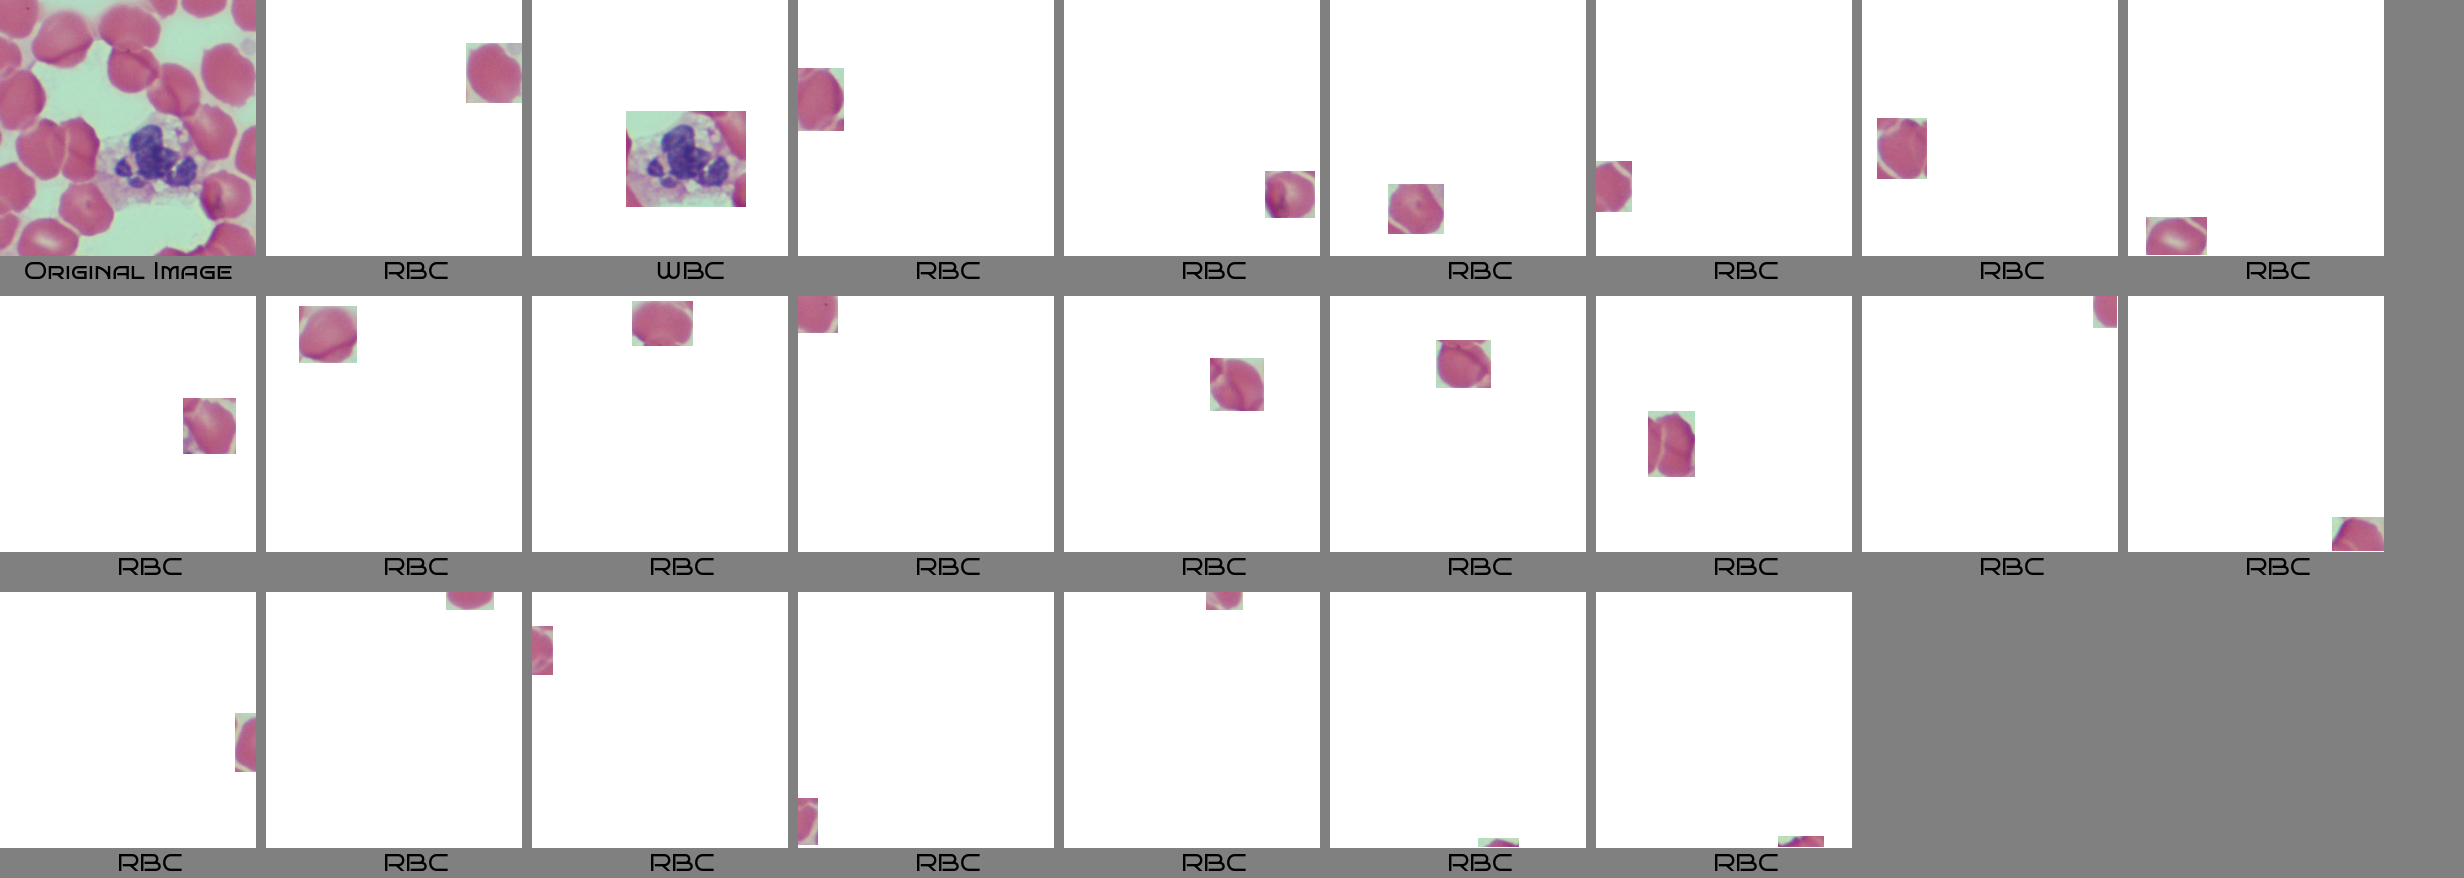

In [18]:
create_image_grid(img, crop_cell_images, cls, 3, 9, 'cropped-cell.jpg')

In [19]:
### Geometric Dimensions
### Using CV2 and sklearn

from google.colab.patches import cv2_imshow
from skimage import measure

def geometric_properties(input):

  # Read the image
  image = input

  # Convert the image to grayscale
  image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Threshold the image
  _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # Find contours in the image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Select the largest contour
  contour = max(contours, key=cv2.contourArea)

  # Get the bounding box of the contour
  x, y, w, h = cv2.boundingRect(contour)

  # Calculate the dimensions of the cell
  height = w - x
  width = h - y

  # Extract the color information from the cell bounding box
  cell_pixels = image[x:w, y:h, :]
  cell_color = np.mean(cell_pixels, axis=(0, 1))


  # Calculate the area and aspect ratio of the contour
  area = cv2.contourArea(contour)
  aspect_ratio = float(w) / h

  # Calculate the area and perimeter of the cell
  area = cv2.contourArea(contour)
  perimeter = cv2.arcLength(contour, True)

  # Fit an ellipse to the contour and calculate aspect ratio
  ellipse = cv2.fitEllipse(contour)
  aspect_ratio = ellipse[1][0] / ellipse[1][1]
  dimensions = ellipse[1]
  major_axis = max(dimensions)
  minor_axis = min(dimensions)

  # Calculate solidity
  hull = cv2.convexHull(contour)
  hull_area = cv2.contourArea(hull)
  solidity = float(area) / hull_area

  # Draw the contour and ellipse on the original image
  cv2.drawContours(image, [contour], -1, (0, 255, 0), 1)

  # Perform segmentation using scikit-image
  labels = measure.label(thresh, background=0)
  props = measure.regionprops(labels)
  prop = max(props, key=lambda x: x.area)

  # Display the results
  print('Dimensions:', w, 'x', h)
  print('Area:', area)
  print('Perimeter:', perimeter)
  print('Major Axis:', major_axis)
  print('Minor Axis:', minor_axis)
  print('Aspect Ratio:', aspect_ratio)
  print('Solidity:', solidity)


  # Calculate eccentricity, convexity, Feret diameter, and orientation of each cell

  eccentricity = prop['eccentricity']
  convex_area = prop['convex_area']
  area = prop['area']
  convexity = float(area) / convex_area
  feret_diameter = prop['feret_diameter_max']
  orientation = prop['orientation']

  # Do something with the calculated features
  print('Eccentricity:', eccentricity)
  print('Convexity:', convexity)
  print('Feret Diameter:', feret_diameter)
  print('Orientation:', orientation)

  # Display the image
  cv2_imshow(image)
  cv2_imshow(thresh)

  return [w ,h ,area ,perimeter ,major_axis ,minor_axis ,aspect_ratio ,solidity ,eccentricity ,convexity ,feret_diameter , orientation, contour]



In [20]:
### Cell Colour

import webcolors
import urllib.request
import json
from scipy.spatial import KDTree
import webcolors

from PIL import Image
import numpy as np
import webcolors
import urllib.request
from scipy.spatial import KDTree

def get_mean_color(image, contour):

  image = np.array(image)

  # create a mask from the contour
  mask = np.ones(image.shape[:2], dtype=np.uint8)
  cv2.drawContours(mask, [contour], -1, 255, -1)

  # extract the mean color from the masked region
  mean_color = cv2.mean(image, mask=mask)[:3]
  print("RGB:",*mean_color)

  # convert the mean color to its nearest color word using the xkcd color dataset
  with urllib.request.urlopen("https://xkcd.com/color/rgb.txt") as url:
      data = url.read().decode()
  colors = list([tuple(line.split('\t')[:2]) for line in data.split('\n') if line])

  c= {}
  for i in range(1, len(colors)):
    c[colors[i][0]] = colors[i][1]

  color_names = list(c.keys())
  color_hex = list(c.values())
  color_values = [webcolors.hex_to_rgb(color) for color in c.values()]

  # Convert RGB value to hex
  hex_color = '#{:02x}{:02x}{:02x}'.format(*[int(i) for i in mean_color])
  print("HEX:",hex_color)

  # Find nearest hex value in xkcd color dataset
  tree = KDTree([webcolors.hex_to_rgb(hex_value) for hex_value in color_hex])
  distance, index = tree.query(webcolors.hex_to_rgb(hex_color))

  word = color_names[index]
  print("Color Word:",word)

  image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

  return [mean_color, hex_color, word]

Dimensions: 46 x 63
Area: 2277.5
Perimeter: 198.95331704616547
Major Axis: 63.09161376953125
Minor Axis: 54.90299987792969
Aspect Ratio: 0.8702107395522655
Solidity: 0.964021164021164
Eccentricity: 0.6872164649018788
Convexity: 0.9625711960943857
Feret Diameter: 67.4166151627327
Orientation: 0.02480958502798407


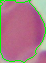

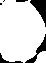

RGB: 180.82022084195998 113.36680469289165 142.32470669427192
HEX: #b4718e
Color Word: mauve


In [21]:
*_, contour = geometric_properties(crop_cells[2])
_ = get_mean_color(crop_cells[2], contour)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[     36.303      46.457      26.353      68.885]
 [     115.15      46.457      84.121      68.885]]
Dissimilarity: [[     3.7706      4.2197       3.289      4.9143]
 [     6.2627      4.2197      5.4452      4.9143]]
Homogeneity: [[    0.31173     0.28077      0.3247     0.27264]
 [    0.24378     0.28077     0.24697     0.27264]]
Energy: [[    0.05426    0.053099    0.054345     0.05218]
 [    0.04981    0.053099    0.050245     0.05218]]
Correlation: [[    0.97868     0.97194     0.98462     0.95834]
 [    0.93062     0.97194     0.94973     0.95834]]


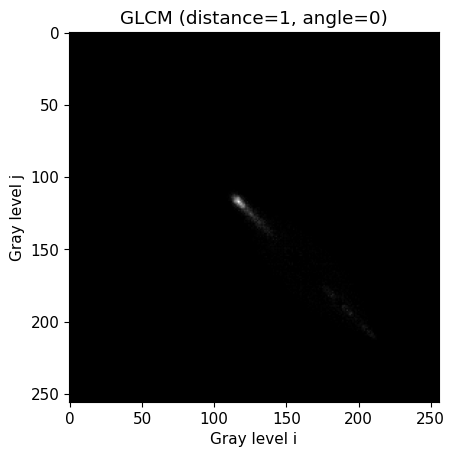

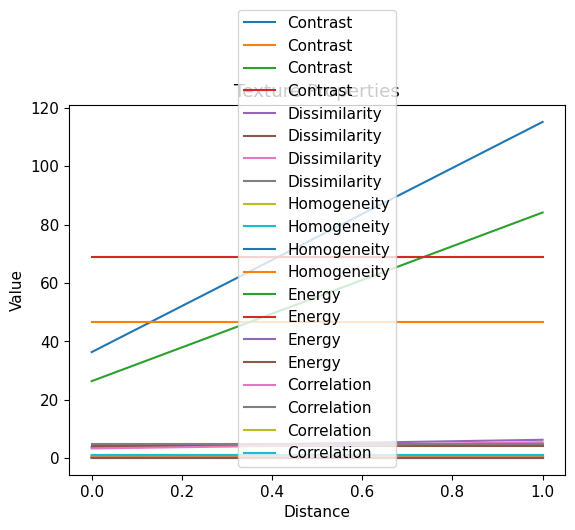

In [22]:
### Texture Properties

# Ensure that plots are displayed inline in the notebook
%matplotlib inline
import skimage.io
import skimage.color
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt


# Read the image in PIL format
image = crop_cells[0]

# Convert the PIL image to a numpy array
image = np.array(image)

# Remove the alpha channel
image = image[:, :, :3]

# Convert the image to grayscale
image_gray = skimage.color.rgb2gray(image)
image_gray = skimage.img_as_ubyte(image_gray)

# Compute the GLCM matrix
distances = [1, 2]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
levels = 256
symmetric = True
normed = True
glcm = greycomatrix(image_gray, distances=distances, angles=angles, levels=levels,
                    symmetric=symmetric, normed=normed)

# Compute the texture properties from the GLCM matrix
contrast = greycoprops(glcm, 'contrast')
dissimilarity = greycoprops(glcm, 'dissimilarity')
homogeneity = greycoprops(glcm, 'homogeneity')
energy = greycoprops(glcm, 'energy')
correlation = greycoprops(glcm, 'correlation')

# Print the texture properties
print('Contrast:', contrast)
print('Dissimilarity:', dissimilarity)
print('Homogeneity:', homogeneity)
print('Energy:', energy)
print('Correlation:', correlation)

# Visualize the GLCM matrix
fig, ax = plt.subplots()
ax.imshow(glcm[:, :, 0, 0], cmap='gray')
ax.set_title('GLCM (distance=1, angle=0)')
ax.set_xlabel('Gray level i')
ax.set_ylabel('Gray level j')
plt.show()

# Visualize the texture properties
fig, ax = plt.subplots()
ax.plot(contrast, label='Contrast')
ax.plot(dissimilarity, label='Dissimilarity')
ax.plot(homogeneity, label='Homogeneity')
ax.plot(energy, label='Energy')
ax.plot(correlation, label='Correlation')
ax.set_title('Texture Properties')
ax.set_xlabel('Distance')
ax.set_ylabel('Value')
ax.legend()
plt.show()

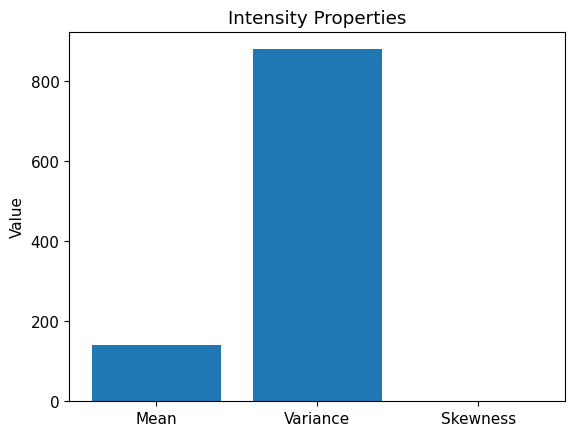

In [23]:
### Intensity Properties

import numpy as np
import skimage.io
import skimage.color
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt

# Read the image in PIL format
image = crop_cells[0]

# Convert the PIL image to a numpy array
image = np.array(image)

# Remove the alpha channel
image = image[:, :, :3]

# Convert the image to grayscale and unsigned integer data type
image_gray = skimage.color.rgb2gray(image)
image_gray = skimage.img_as_ubyte(image_gray)

# Compute the intensity properties
mean_intensity = np.mean(image_gray)
variance_intensity = np.var(image_gray)
skewness_intensity = np.mean((image_gray - mean_intensity)**3) / np.power(variance_intensity, 1.5)

# Visualize the intensity properties
fig, ax = plt.subplots()
ax.bar(['Mean', 'Variance', 'Skewness'], [mean_intensity, variance_intensity, skewness_intensity])
ax.set_title('Intensity Properties')
ax.set_ylabel('Value')
plt.show()

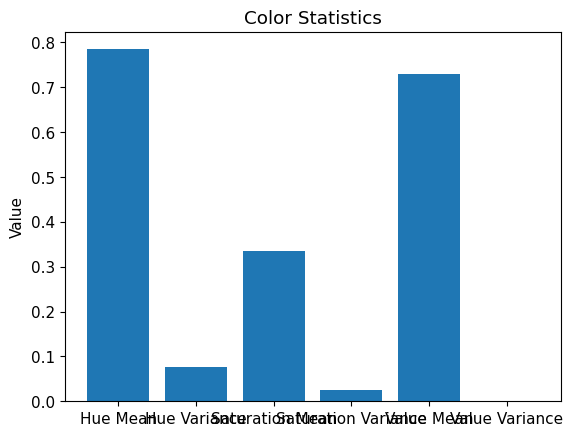

In [24]:
import numpy as np
import skimage.io
import skimage.color
import matplotlib.pyplot as plt

# Read the image in PIL format
image = crop_cells[0]

# Convert the PIL image to a numpy array
image = np.array(image)

# Remove the alpha channel
image = image[:, :, :3]

# Convert the image to the HSV color space
image_hsv = skimage.color.rgb2hsv(image)

# Compute the color statistics
hue_mean = np.mean(image_hsv[:, :, 0])
hue_variance = np.var(image_hsv[:, :, 0])
saturation_mean = np.mean(image_hsv[:, :, 1])
saturation_variance = np.var(image_hsv[:, :, 1])
value_mean = np.mean(image_hsv[:, :, 2])
value_variance = np.var(image_hsv[:, :, 2])

# Visualize the color statistics
fig, ax = plt.subplots()
ax.bar(['Hue Mean', 'Hue Variance', 'Saturation Mean', 'Saturation Variance', 'Value Mean', 'Value Variance'],
       [hue_mean, hue_variance, saturation_mean, saturation_variance, value_mean, value_variance])
ax.set_title('Color Statistics')
ax.set_ylabel('Value')
plt.show()

Dimensions: 55 x 59
Area: 2371.0
Perimeter: 187.68123948574066
Major Axis: 61.63773727416992
Minor Axis: 49.49147415161133
Aspect Ratio: 0.8029411256852117
Solidity: 0.972319048595448
Eccentricity: 0.5852380449924356
Convexity: 0.9711005542359462
Feret Diameter: 64.07027391856539
Orientation: 0.5921952136775931


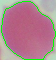

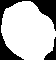

RGB: 183.74136904761906 127.4232142857143 150.34077380952382
HEX: #b77f96
Color Word: grey pink

Dimensions: 100 x 84
Area: 3726.5
Perimeter: 626.0559102296829
Major Axis: 87.83086395263672
Minor Axis: 68.87857055664062
Aspect Ratio: 0.7842182970417299
Solidity: 0.6115532944941331
Eccentricity: 0.7254783491859031
Convexity: 0.641721535249719
Feret Diameter: 107.33592129385204
Orientation: -1.190836874676305


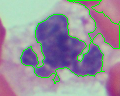

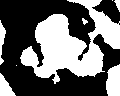

RGB: 158.4129340277778 139.52517361111111 163.73203125
HEX: #9e8ba3
Color Word: heather

Dimensions: 46 x 63
Area: 2277.5
Perimeter: 198.95331704616547
Major Axis: 63.09161376953125
Minor Axis: 54.90299987792969
Aspect Ratio: 0.8702107395522655
Solidity: 0.964021164021164
Eccentricity: 0.6872164649018788
Convexity: 0.9625711960943857
Feret Diameter: 67.4166151627327
Orientation: 0.02480958502798407


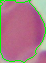

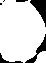

RGB: 180.82022084195998 113.36680469289165 142.32470669427192
HEX: #b4718e
Color Word: mauve

Dimensions: 49 x 47
Area: 1811.0
Perimeter: 164.2253955602646
Major Axis: 51.767120361328125
Minor Axis: 46.8779182434082
Aspect Ratio: 0.9055539098216417
Solidity: 0.9789189189189189
Eccentricity: 0.430353864174079
Convexity: 0.8565510098394614
Feret Diameter: 53.71219600798314
Orientation: 1.477115639141473


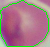

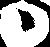

RGB: 177.15148936170212 114.05234042553191 145.13914893617022
HEX: #b17291
Color Word: mauve

Dimensions: 55 x 50
Area: 1987.0
Perimeter: 173.68123877048492
Major Axis: 56.556854248046875
Minor Axis: 45.4567985534668
Aspect Ratio: 0.8037363314816364
Solidity: 0.9678519240136386
Eccentricity: 0.5636876588463514
Convexity: 0.9446788560712611
Feret Diameter: 58.249463516842795
Orientation: 0.9044764452507259


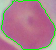

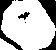

RGB: 181.47892857142858 119.96 148.20392857142858
HEX: #b57794
Color Word: mauve

Dimensions: 35 x 49
Area: 1318.0
Perimeter: 146.91168785095215
Major Axis: 47.38432312011719
Minor Axis: 46.455013275146484
Aspect Ratio: 0.9803878206170648
Solidity: 0.9652142072500915
Eccentricity: 0.6700660448489005
Convexity: 0.9658298465829847
Feret Diameter: 51.24451190127583
Orientation: 0.06041030314016604


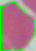

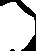

RGB: 181.23474945533772 115.45697167755992 143.6214596949891
HEX: #b5738f
Color Word: mauve

Dimensions: 49 x 60
Area: 2094.0
Perimeter: 202.8528118133545
Major Axis: 57.99299621582031
Minor Axis: 53.610198974609375
Aspect Ratio: 0.9244254043212321
Solidity: 0.924299271683955
Eccentricity: 0.5146674798289337
Convexity: 0.9285714285714286
Feret Diameter: 61.84658438426491
Orientation: -0.10457514082964105


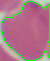

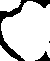

RGB: 180.9432786885246 112.74754098360656 142.8527868852459
HEX: #b4708e
Color Word: mauve

Dimensions: 60 x 37
Area: 1705.5
Perimeter: 167.15432786941528
Major Axis: 57.559539794921875
Minor Axis: 51.05844497680664
Aspect Ratio: 0.8870544336998194
Solidity: 0.9801724137931035
Eccentricity: 0.79255596227843
Convexity: 0.8247252747252747
Feret Diameter: 62.6418390534633
Orientation: -1.5578970579925475


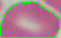

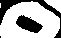

RGB: 182.01423641069889 122.03192407247627 149.0064710957722
HEX: #b67a95
Color Word: old rose

Dimensions: 53 x 56
Area: 1959.0
Perimeter: 314.10764503479004
Major Axis: 53.878456115722656
Minor Axis: 50.129859924316406
Aspect Ratio: 0.9304249516104388
Solidity: 0.786273329319687
Eccentricity: 0.5151996895632176
Convexity: 0.8106646058732612
Feret Diameter: 70.60453243241541
Orientation: 0.7274784751677119


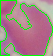

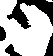

RGB: 181.3972371967655 120.12634770889488 148.2257412398922
HEX: #b57894
Color Word: mauve

Dimensions: 58 x 55
Area: 2374.5
Perimeter: 188.26702570915222
Major Axis: 59.30483627319336
Minor Axis: 52.14297103881836
Aspect Ratio: 0.8792364049133669
Solidity: 0.9747536945812808
Eccentricity: 0.4723217825313318
Convexity: 0.9719145569620253
Feret Diameter: 62.433965115151864
Orientation: -0.9874326042741074


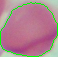

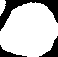

RGB: 183.55444646098005 126.40048396854206 150.49546279491835
HEX: #b77e96
Color Word: old rose

Dimensions: 60 x 44
Area: 2031.5
Perimeter: 183.78174531459808
Major Axis: 60.93206787109375
Minor Axis: 43.85429382324219
Aspect Ratio: 0.7197243644515586
Solidity: 0.9673809523809523
Eccentricity: 0.6926724789542464
Convexity: 0.9688216414488766
Feret Diameter: 61.39218191268331
Orientation: 1.4523530835617535


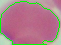

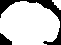

RGB: 183.50564663023678 120.13806921675774 145.91621129326046
HEX: #b77891
Color Word: old pink

Dimensions: 39 x 37
Area: 1198.5
Perimeter: 135.6984840631485
Major Axis: 52.83085632324219
Minor Axis: 39.779197692871094
Aspect Ratio: 0.7529538694107973
Solidity: 0.9839901477832512
Eccentricity: 0.3567445618007997
Convexity: 0.9836448598130841
Feret Diameter: 47.01063709417264
Orientation: -0.8728579398819485


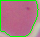

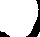

RGB: 184.8445945945946 113.2418918918919 141.2777027027027
HEX: #b8718d
Color Word: mauve

Dimensions: 54 x 53
Area: 2167.5
Perimeter: 227.43859839439392
Major Axis: 60.19292449951172
Minor Axis: 46.86898422241211
Aspect Ratio: 0.7786460719779832
Solidity: 0.9350733390854185
Eccentricity: 0.6707444454862483
Convexity: 0.9426910299003323
Feret Diameter: 71.50524456289902
Orientation: 0.7983927736444885


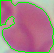

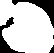

RGB: 181.24074074074073 116.1638714185884 144.8881900768693
HEX: #b57490
Color Word: mauve

Dimensions: 53 x 48
Area: 2026.0
Perimeter: 247.19595766067505
Major Axis: 58.07582473754883
Minor Axis: 49.683345794677734
Aspect Ratio: 0.8554910071308045
Solidity: 0.8872345084300416
Eccentricity: 0.5070689710183496
Convexity: 0.9006315789473684
Feret Diameter: 70.09279563550022
Orientation: 1.0220813065655883


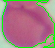

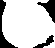

RGB: 179.825 113.71401515151516 142.7875
HEX: #b3718e
Color Word: mauve

Dimensions: 47 x 64
Area: 2504.5
Perimeter: 220.4680358171463
Major Axis: 63.8127326965332
Minor Axis: 55.57718276977539
Aspect Ratio: 0.8709419017373435
Solidity: 0.9392462028876805
Eccentricity: 0.651888727409329
Convexity: 0.9393063583815029
Feret Diameter: 75.6042326857432
Orientation: 0.20330691107308668


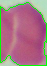

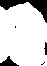

RGB: 177.67408123791103 112.77304964539007 141.43907156673114
HEX: #b1708d
Color Word: mauve

Dimensions: 23 x 31
Area: 581.5
Perimeter: 97.55634891986847
Major Axis: 38.115272521972656
Minor Axis: 27.306060791015625
Aspect Ratio: 0.7164073344949653
Solidity: 0.9897872340425532
Eccentricity: 0.7148741587107846
Convexity: 0.9874411302982732
Feret Diameter: 37.44329045369811
Orientation: 0.28621873378615414


RGB: 183.11328125 122.49869791666666 150.29036458333331
HEX: #b77a96
Color Word: old rose

Dimensions: 52 x 34
Area: 1280.0
Perimeter: 149.25483310222626
Major Axis: 72.87133026123047
Minor Axis: 51.9989128112793
Aspect Ratio: 0.7135716148569355
Solidity: 0.9782193351165457
Eccentricity: 0.7404405082518182
Convexity: 0.9782451051486585
Feret Diameter: 52.773099207835045
Orientation: 1.530808836408152


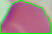

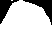

RGB: 180.14932126696834 120.26414027149322 144.85011312217196
HEX: #b47890
Color Word: mauve

Dimensions: 21 x 54
Area: 768.0
Perimeter: 129.5979791879654
Major Axis: 67.12142181396484
Minor Axis: 49.6364860534668
Aspect Ratio: 0.7395028995518053
Solidity: 0.9764780673871583
Eccentricity: 0.9130153409093883
Convexity: 0.9752650176678446
Feret Diameter: 54.147945482723536
Orientation: -0.0647308327902275


RGB: 182.96045197740114 128.864406779661 151.02582728006456
HEX: #b68097
Color Word: dusty lavender

Dimensions: 46 x 18
Area: 557.0
Perimeter: 109.94112479686737
Major Axis: 45.269798278808594
Minor Axis: 33.131629943847656
Aspect Ratio: 0.7318705009418393
Solidity: 0.9720767888307156
Eccentricity: 0.9224169618520845
Convexity: 0.9681528662420382
Feret Diameter: 46.17358552246078
Orientation: -1.55589740376169


RGB: 183.39814814814812 132.22916666666666 153.53587962962962
HEX: #b78499
Color Word: grey pink

Dimensions: 21 x 45
Area: 701.0
Perimeter: 151.25483298301697
Major Axis: 47.336463928222656
Minor Axis: 22.345457077026367
Aspect Ratio: 0.47205589988532487
Solidity: 0.8884664131812421
Eccentricity: 0.8859990547787894
Convexity: 0.9080188679245284
Feret Diameter: 49.24428900898052
Orientation: 0.12992700458615494


RGB: 184.26530612244898 116.91253644314868 145.42759961127308
HEX: #b87491
Color Word: mauve

Dimensions: 20 x 44
Area: 559.5
Perimeter: 137.84061932563782
Major Axis: 44.94609069824219
Minor Axis: 23.290250778198242
Aspect Ratio: 0.5181819022829744
Solidity: 0.8811023622047244
Eccentricity: 0.9103170804026559
Convexity: 0.9002890173410405
Feret Diameter: 47.92702786528704
Orientation: -0.14477102954129464


RGB: 183.8595744680851 123.40851063829787 148.63510638297873
HEX: #b77b94
Color Word: old rose

Dimensions: 28 x 17
Area: 291.0
Perimeter: 74.28427040576935
Major Axis: 53.107723236083984
Minor Axis: 28.81644058227539
Aspect Ratio: 0.5426035767749895
Solidity: 0.9635761589403974
Eccentricity: 0.7676782776449833
Convexity: 0.9587020648967551
Feret Diameter: 28.635642126552707
Orientation: 1.4671037991251428


RGB: 185.85285285285286 134.61861861861863 153.8033033033033
HEX: #b98699
Color Word: grey pink

Dimensions: 33 x 8
Area: 127.5
Perimeter: 72.38477599620819
Major Axis: 4416.02197265625
Minor Axis: 346.86199951171875
Aspect Ratio: 0.07854625761816132
Solidity: 0.8823529411764706
Eccentricity: 0.9696982110623212
Convexity: 0.9050279329608939
Feret Diameter: 33.06055050963308
Orientation: 1.526248347206292


RGB: 175.71273712737127 159.38482384823848 166.82384823848238
HEX: #af9fa6
Color Word: greyish

Dimensions: 46 x 11
Area: 344.5
Perimeter: 107.55634903907776
Major Axis: 50.75920104980469
Minor Axis: 13.607885360717773
Aspect Ratio: 0.26808706755186673
Solidity: 0.8994778067885117
Eccentricity: 0.9665558523190524
Convexity: 0.9084668192219679
Feret Diameter: 47.07440918375928
Orientation: -1.4867492174272707


RGB: 174.34584980237153 119.15217391304347 145.50395256916994
HEX: #ae7791
Color Word: mauve



In [25]:
data_list = []

for i in range(len(crop_cells)):
  *geo_data, contour = geometric_properties(crop_cells[i])
  colors = get_mean_color(crop_cells[i], contour)
  print('')

  datas = geo_data + colors
  data_list.append(datas)

In [30]:
import pandas as pd

# List of rows
rows = [*data_list]

# Column names
columns = ['Width', 'Height', 'Area', 'Perimeter', 'Major Axis', 'Minor Axis', 'Aspect Ratio', 'Solidity', 'Eccentricity', 'Convexity', 'Feret_Diameter', 'Orientation ','RGB', 'HEX', 'Color']

# Create DataFrame
df = pd.DataFrame(rows, columns=columns)

# set the index to start from 1
df.index = range(1, len(df)+1)


# Save to CSV file
df.to_csv('/content/drive/MyDrive/Ninti/cell_data.xlsx', index=True)

In [31]:
df

,Width,Height,Area,Perimeter,Major Axis,...,Feret_Diameter,Orientation,RGB,HEX,Color
1,55,59,2453,187.681239,61.637737,...,64.070274,0.592195,"(183.74136904761906, 127.4232142857143, 150.34...",#b77f96,grey pink
2,100,84,3996,626.055910,87.830864,...,107.335921,-1.190837,"(158.4129340277778, 139.52517361111111, 163.73...",#9e8ba3,heather
3,46,63,2366,198.953317,63.091614,...,67.416615,0.024810,"(180.82022084195998, 113.36680469289165, 142.3...",#b4718e,mauve
4,49,47,1654,164.225396,51.767120,...,53.712196,1.477116,"(177.15148936170212, 114.05234042553191, 145.1...",#b17291,mauve
5,55,50,2015,173.681239,56.556854,...,58.249464,0.904476,"(181.47892857142858, 119.96, 148.20392857142858)",#b57794,mauve
6,35,49,1385,146.911688,47.384323,...,51.244512,0.060410,"(181.23474945533772, 115.45697167755992, 143.6...",#b5738f,mauve
7,49,60,2184,202.852812,57.992996,...,61.846584,-0.104575,"(180.9432786885246, 112.74754098360656, 142.85...",#b4708e,mauve
8,60,37,1501,167.154328,57.559540,...,62.641839,-1.557897,"(182.01423641069889, 122.03192407247627, 149.0...",#b67a95,old rose
9,53,56,2098,314.107645,53.878456,...,70.604532,0.727478,"(181.3972371967655, 120.12634770889488, 148.22...",#b57894,mauve
10,58,55,2457,188.267026,59.304836,...,62.433965,-0.987433,"(183.55444646098005, 126.40048396854206, 150.4...",#b77e96,old rose


In [29]:
# Note that you need to have the openpyxl package installed in order to save to Excel format. If you don't have it installed,
# you can install it using pip:

#!pip install openpyxl

# This will install the openpyxl package, which is required for working with Excel files in Pandas.